In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()


In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#  Selecting features

In [3]:
x = data.iloc[:,2:4]
x

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


#  Creating an instance of the cluster

In [4]:
kmeans = KMeans(5)

In [5]:
kmeans.fit(x)

KMeans(n_clusters=5)

##  Predicted values

In [6]:
identified_values = kmeans.fit_predict(x)
identified_values

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 4, 0, 4, 4, 4, 0, 4, 4, 4, 1, 4, 4, 4,
       0, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
data_cluster = data.copy()
pd.options.display.max_rows =999
data_cluster['cluster'] = identified_values
data_cluster

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
5,6,Female,22,17,76,3
6,7,Female,35,18,6,3
7,8,Female,23,18,94,3
8,9,Male,64,19,3,1
9,10,Female,30,19,72,3


Text(0, 0.5, 'Annual Income')

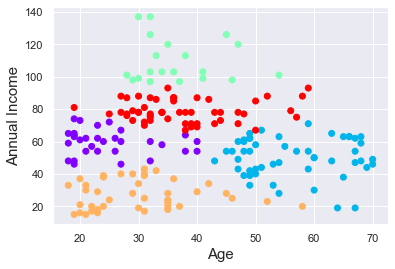

In [8]:
plt.scatter(x['Age'],x['Annual Income (k$)'],c=data_cluster['cluster'], cmap = 'rainbow')
plt.xlabel('Age', size = '15')
plt.ylabel('Annual Income', size= '15')

##  Within cluster sum of squares (WCSS)

In [9]:
kmeans.inertia_ 

31651.380885243798

###  Finding he optimal number of clusters using a wcss loop

In [10]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\Kyle\anaconda2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss

[176108.77999999997,
 87121.56591478694,
 59486.961439280356,
 39529.887967363524,
 31659.353138717805,
 25399.022004416987,
 22036.77658421442,
 19020.091832559345,
 15989.122931109068]

##  The Elbow method

In [12]:
number_of_cluster = range(1,10)

Text(0.5, 1.0, 'The Elbow Method')

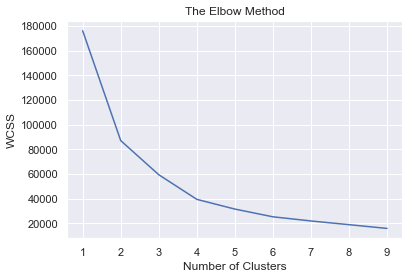

In [13]:
plt.plot(number_of_cluster,wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')